In [2]:
import pandas as pd

In [60]:
data = pd.read_csv('MetroPT3(AirCompressor).CSV')
data = data.drop('Unnamed: 0', axis=1)

In [75]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [76]:
data['failure'] = 0

In [89]:
data.loc[(data.index>='2020-04-18 00:00:00') & (data.index<='2020-04-18 23:59:00'), 'failure'] = 1
data.loc[(data.index>='2020-05-29 23:30:00') & (data.index<='2020-05-30 06:00:00'), 'failure'] = 1
data.loc[(data.index>='2020-06-05 10:00:00') & (data.index<='2020-06-07 14:30:00'), 'failure'] = 1
data.loc[(data.index>='2020-07-15 14:30:00') & (data.index<='2020-07-15 19:00:00'), 'failure'] = 1

In [95]:
data.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [109]:
data['failure'].mean()

0.019746227293222972

In [92]:
data.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'failure'],
      dtype='object')

In [93]:
pip install pytorch_tabnet

     -------------------------------------- 44.5/44.5 kB 552.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from sklearn.preprocessing import LabelEncoder

In [104]:
# Preprocess the data

# Split the data into features and target variable
X = data.drop(columns=['failure'])
y = data['failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize TabNet classifier
clf = TabNetClassifier()

# Train the model
clf.fit(
    X_train.values, y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy']
)

# Predictions on the test set
y_pred_TN = clf.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_TN)
print(f'Accuracy: {accuracy}')


C:\Users\vgupt\AppData\Local\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.02409 | train_accuracy: 0.99319 | test_accuracy: 0.99318 |  0:02:55s
epoch 1  | loss: 0.01701 | train_accuracy: 0.9939  | test_accuracy: 0.9939  |  0:05:45s
epoch 2  | loss: 0.01509 | train_accuracy: 0.99626 | test_accuracy: 0.99628 |  0:08:35s
epoch 3  | loss: 0.01534 | train_accuracy: 0.99333 | test_accuracy: 0.99333 |  0:11:26s
epoch 4  | loss: 0.01588 | train_accuracy: 0.99378 | test_accuracy: 0.99381 |  0:14:25s
epoch 5  | loss: 0.01552 | train_accuracy: 0.99422 | test_accuracy: 0.99416 |  0:17:15s
epoch 6  | loss: 0.01395 | train_accuracy: 0.99415 | test_accuracy: 0.99402 |  0:20:04s
epoch 7  | loss: 0.01397 | train_accuracy: 0.99421 | test_accuracy: 0.9942  |  0:22:50s
epoch 8  | loss: 0.01376 | train_accuracy: 0.99465 | test_accuracy: 0.99458 |  0:25:38s
epoch 9  | loss: 0.01354 | train_accuracy: 0.99425 | test_accuracy: 0.99416 |  0:28:26s
epoch 10 | loss: 0.01362 | train_accuracy: 0.99435 | test_accuracy: 0.99434 |  0:31:15s
epoch 11 | loss: 0.01428 | train

C:\Users\vgupt\AppData\Local\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9962776184668798


In [106]:
print('Classification Report:')
print(classification_report(y_test, y_pred_TN))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    445967
           1       0.87      0.96      0.91      9118

    accuracy                           1.00    455085
   macro avg       0.93      0.98      0.95    455085
weighted avg       1.00      1.00      1.00    455085



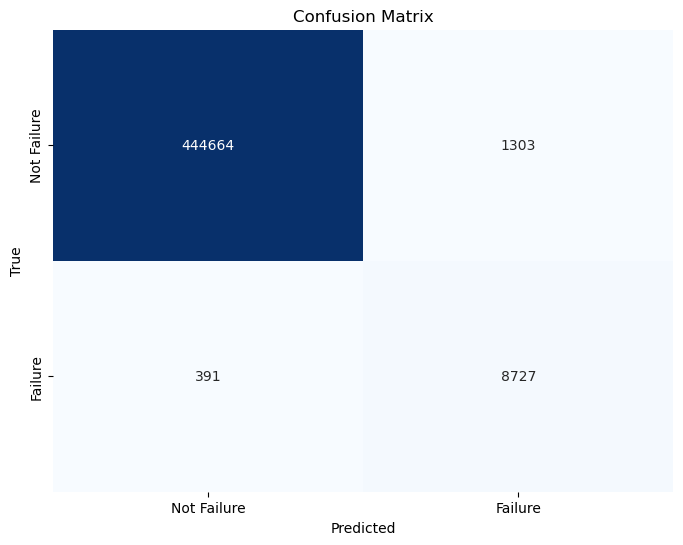

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming logreg is your Logistic Regression model
# (you can replace it with the actual variable name of your trained model)
conf_matrix = confusion_matrix(y_test, y_pred_TN)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Failure', 'Failure'],
            yticklabels=['Not Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred_log = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_log))

C:\Users\vgupt\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9870507707351374
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    445967
           1       0.66      0.73      0.69      9118

    accuracy                           0.99    455085
   macro avg       0.83      0.86      0.84    455085
weighted avg       0.99      0.99      0.99    455085



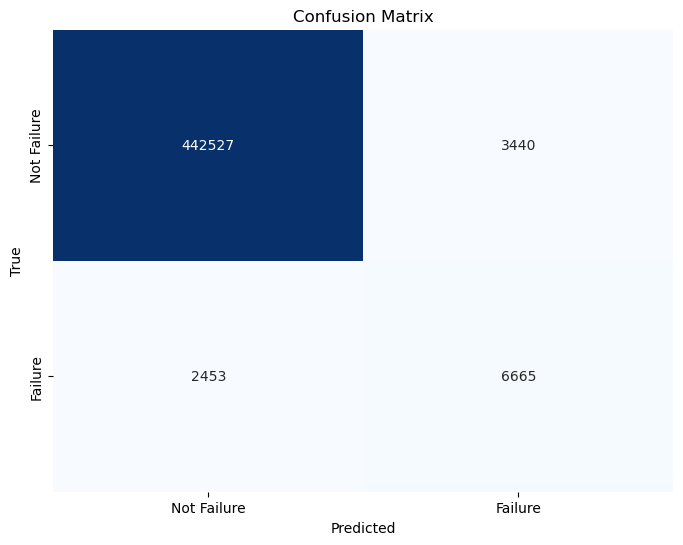

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming logreg is your Logistic Regression model
# (you can replace it with the actual variable name of your trained model)
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Failure', 'Failure'],
            yticklabels=['Not Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()